In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [58]:
df = pd.read_csv("./RealEstate_California.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35389 entries, 0 to 35388
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35389 non-null  int64  
 1   id                  35389 non-null  object 
 2   stateId             35389 non-null  int64  
 3   countyId            35389 non-null  int64  
 4   cityId              35389 non-null  int64  
 5   country             35389 non-null  object 
 6   datePostedString    35386 non-null  object 
 7   is_bankOwned        35389 non-null  int64  
 8   is_forAuction       35389 non-null  int64  
 9   event               35100 non-null  object 
 10  time                35100 non-null  float64
 11  price               35389 non-null  float64
 12  pricePerSquareFoot  35389 non-null  float64
 13  city                35389 non-null  object 
 14  state               35389 non-null  object 
 15  yearBuilt           35389 non-null  int64  
 16  stre

In [60]:
df.head(5)

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,currency,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1610496000000.00,145000.00,0.00,Gold Run,CA,0,0 Moody Ridge Rd,95717.00,-120.83,39.17,0,Amazing opportunity to build your dream home O...,USD,0.00,0.00,Acres,0.00,0.00,0.00,0,0.00,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1626048000000.00,675000.00,404.00,Pinole,CA,1958,1476 Belden Ct,94564.00,-122.30,38.00,0,"""Great house in a wonderful neighborhood! Wal...",USD,1671.00,1671.00,sqft,2.00,3.00,1671.00,1,2.00,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1625702400000.00,649000.00,459.00,Pinole,CA,1959,3540 Savage Ave,94564.00,-122.27,37.98,0,"""Light-filled mid-century 3 BR 2 BA home in th...",USD,1414.00,1414.00,Acres,2.00,3.00,1414.00,1,2.00,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1625616000000.00,599000.00,448.00,Pinole,CA,1908,2391 Plum St,94564.00,-122.29,38.00,0,The cutest house in the historic district of P...,USD,1336.00,1336.00,sqft,2.00,3.00,1336.00,1,1.00,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1625616000000.00,299000.00,0.00,Pinole,CA,0,2693 Appian Way,94564.00,-122.30,37.99,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,USD,0.00,0.00,Acres,0.00,0.00,0.00,0,0.00,0,0,0,0,0,0,LOT,Contra Costa County


In [61]:
list(df)

['Unnamed: 0',
 'id',
 'stateId',
 'countyId',
 'cityId',
 'country',
 'datePostedString',
 'is_bankOwned',
 'is_forAuction',
 'event',
 'time',
 'price',
 'pricePerSquareFoot',
 'city',
 'state',
 'yearBuilt',
 'streetAddress',
 'zipcode',
 'longitude',
 'latitude',
 'hasBadGeocode',
 'description',
 'currency',
 'livingArea',
 'livingAreaValue',
 'lotAreaUnits',
 'bathrooms',
 'bedrooms',
 'buildingArea',
 'parking',
 'garageSpaces',
 'hasGarage',
 'levels',
 'pool',
 'spa',
 'isNewConstruction',
 'hasPetsAllowed',
 'homeType',
 'county']

In [62]:
df["datePostedString"] = pd.to_datetime(df["datePostedString"], format="%Y-%m-%d")

In [63]:
df['time'] = pd.to_datetime(df['time'], unit='ms')

In [64]:
df['yearBuilt']

0           0
1        1958
2        1959
3        1908
4           0
         ... 
35384    1927
35385    1924
35386    1900
35387    1906
35388    1971
Name: yearBuilt, Length: 35389, dtype: int64

In [65]:
df['yearBuilt'] = df['yearBuilt'].replace(0, np.nan)

In [66]:
df['yearBuilt'] = pd.to_datetime(df['yearBuilt'], format='%Y', errors='coerce')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35389 entries, 0 to 35388
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          35389 non-null  int64         
 1   id                  35389 non-null  object        
 2   stateId             35389 non-null  int64         
 3   countyId            35389 non-null  int64         
 4   cityId              35389 non-null  int64         
 5   country             35389 non-null  object        
 6   datePostedString    35386 non-null  datetime64[ns]
 7   is_bankOwned        35389 non-null  int64         
 8   is_forAuction       35389 non-null  int64         
 9   event               35100 non-null  object        
 10  time                35100 non-null  datetime64[ns]
 11  price               35389 non-null  float64       
 12  pricePerSquareFoot  35389 non-null  float64       
 13  city                35389 non-null  object    

In [68]:
df.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,currency,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,2021-01-13,145000.00,0.00,Gold Run,CA,NaT,0 Moody Ridge Rd,95717.00,-120.83,39.17,0,Amazing opportunity to build your dream home O...,USD,0.00,0.00,Acres,0.00,0.00,0.00,0,0.00,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,2021-07-12,675000.00,404.00,Pinole,CA,1958-01-01,1476 Belden Ct,94564.00,-122.30,38.00,0,"""Great house in a wonderful neighborhood! Wal...",USD,1671.00,1671.00,sqft,2.00,3.00,1671.00,1,2.00,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,2021-07-08,649000.00,459.00,Pinole,CA,1959-01-01,3540 Savage Ave,94564.00,-122.27,37.98,0,"""Light-filled mid-century 3 BR 2 BA home in th...",USD,1414.00,1414.00,Acres,2.00,3.00,1414.00,1,2.00,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,2021-07-07,599000.00,448.00,Pinole,CA,1908-01-01,2391 Plum St,94564.00,-122.29,38.00,0,The cutest house in the historic district of P...,USD,1336.00,1336.00,sqft,2.00,3.00,1336.00,1,1.00,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,2021-07-07,299000.00,0.00,Pinole,CA,NaT,2693 Appian Way,94564.00,-122.30,37.99,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,USD,0.00,0.00,Acres,0.00,0.00,0.00,0,0.00,0,0,0,0,0,0,LOT,Contra Costa County


In [69]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [70]:
df.head()

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,currency,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,2021-01-13,145000.00,0.00,Gold Run,CA,NaT,0 Moody Ridge Rd,95717.00,-120.83,39.17,0,Amazing opportunity to build your dream home O...,USD,0.00,0.00,Acres,0.00,0.00,0.00,0,0.00,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,2021-07-12,675000.00,404.00,Pinole,CA,1958-01-01,1476 Belden Ct,94564.00,-122.30,38.00,0,"""Great house in a wonderful neighborhood! Wal...",USD,1671.00,1671.00,sqft,2.00,3.00,1671.00,1,2.00,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,2021-07-08,649000.00,459.00,Pinole,CA,1959-01-01,3540 Savage Ave,94564.00,-122.27,37.98,0,"""Light-filled mid-century 3 BR 2 BA home in th...",USD,1414.00,1414.00,Acres,2.00,3.00,1414.00,1,2.00,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,2021-07-07,599000.00,448.00,Pinole,CA,1908-01-01,2391 Plum St,94564.00,-122.29,38.00,0,The cutest house in the historic district of P...,USD,1336.00,1336.00,sqft,2.00,3.00,1336.00,1,1.00,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,2021-07-07,299000.00,0.00,Pinole,CA,NaT,2693 Appian Way,94564.00,-122.30,37.99,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,USD,0.00,0.00,Acres,0.00,0.00,0.00,0,0.00,0,0,0,0,0,0,LOT,Contra Costa County


In [73]:
! pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.5 MB/s eta 0:00:00
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 54.7 MB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [74]:
import missingno as msno

<Axes: >

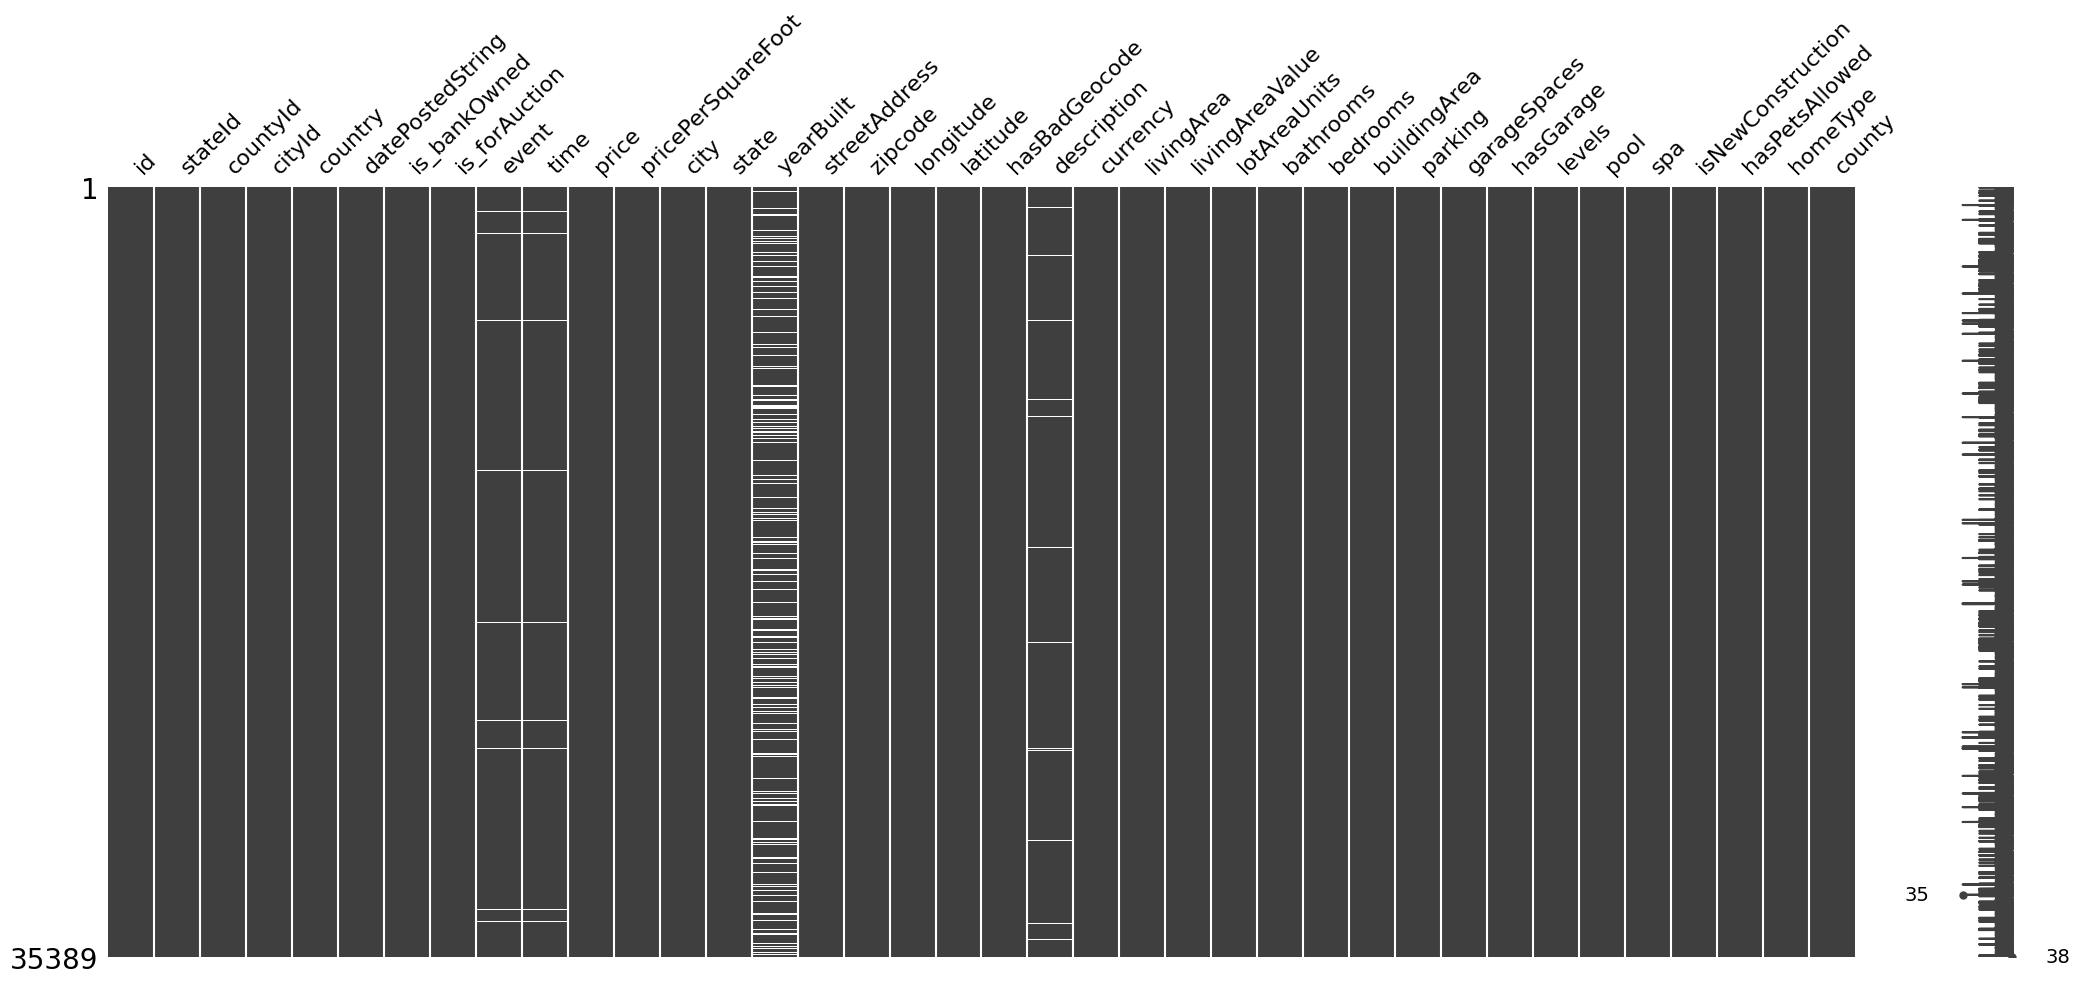

In [75]:
msno.matrix(df)

<Axes: >

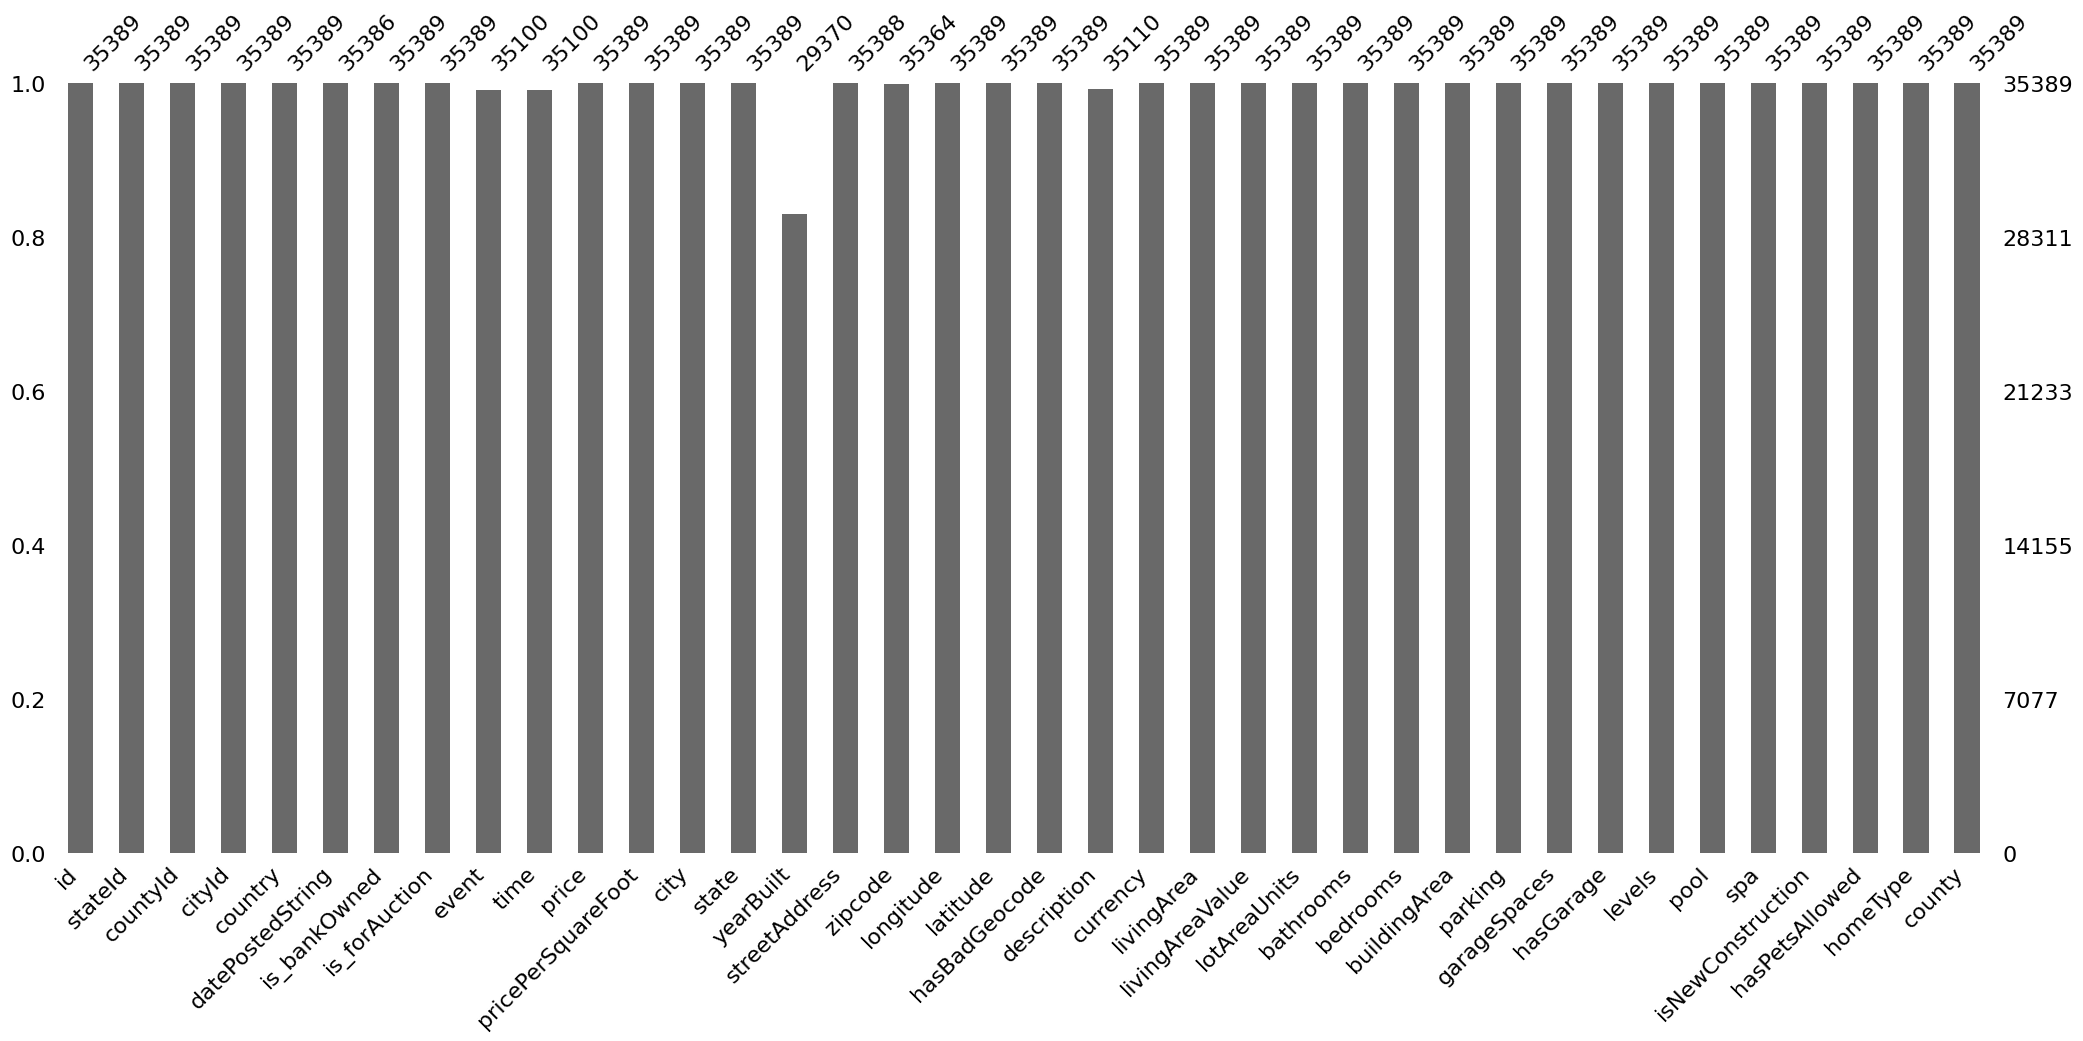

In [76]:
msno.bar(df)